# Tareas

<div class="alert alert-warning">
Fecha límite de entrega: 29 de Septiembre, 2021 23:59
</div>

Colaborado con Sebastián Ibarra, Dara Meneses y Fernanda Arelle

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from sympy import Sum, Indexed, Symbol

In [2]:
class RegresionLineal:
    def __init__(self, alpha=0.03, max_iters=10000, tols=0.00001):
        """
        Parámetros.
        ---------------
        alpha = Learning rate
        max_iters = Número máximo de iteraciones
        tols = definición de convergencia
        """
        self.alpha = alpha
        self.max_iters = max_iters
        self.tols = tols
        self.breaking_iteration = None
        self.historia = {'costo':[], 'beta':[]}  # Con fines de graficación
        
    def gradientDescent(self, x, y):
        """
        Parámetros:
        ---------------
        x = vector de entrenamiento de features
        y = vector de entrenamiento de variable a predecir (target)
        """    
        
        # ajustamos el vector de features
        unos = np.ones((x.shape[0], 1))
        Xt = x.reshape(x.shape[0], 1)
        Xt = np.concatenate((unos, Xt), axis=1)
        
        i = 0
        prep_J = 0
        m, n = Xt.shape
        self.beta = np.zeros(n) 
        
        while i < self.max_iters:     
            # Actualizamos beta
            self.beta = self.beta - self.alpha * self.gradiente(Xt, y)
            
            J = self.costo(Xt, y)
            
            if abs(J - prep_J) <= self.tols:
                print('La función convergió con beta: %s en la iteración %i' % ( str(self.beta), i ))
                self.breaking_iteration = i
                break
            else:
                prep_J = J
            
            self.historia['costo'].append(J)
            self.historia['beta'].append(self.beta)                
            i += 1
    
    def hipotesis(self, x):
        return np.dot(x, self.beta)
    
    def costo(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y
        return np.dot(error.T, error) / (2 * m) 
    
    def gradiente(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y        
        return np.dot(x.T, error) / m    

In [3]:
def plotModelo(x,y,rl,iteracion):
    modelo = lambda x,b,m: b + m*x # función para graficar el modelo
    
    _beta = rl.historia['beta'][iteracion]

    fig, ax = plt.subplots(1,2, figsize=(10,6))
    ax[0].scatter(x,y, label="datos")
    ax[0].plot(x, modelo(x, _beta[0], _beta[1]), label="int: %1.2f, pen: %1.2f" % (_beta[0], _beta[1]))
    ax[0].set_xlabel('Edad (yr)')
    ax[0].set_ylabel('Altura (m)')
    ax[0].legend(loc="best")
    #ax[0].set_xlim(0, max(x))
    #ax[0].set_ylim(0, max(y))
    
    costo  = rl.historia['costo']
    
    iteraciones = [i for i in range(0, len(costo))]
    ax[1].plot(iteraciones, costo, 'g', label="costo")
    ax[1].plot(iteracion, costo[iteracion], 'or', label="iteracion")
    ax[1].set_xlabel('Iteraciones')
    ax[1].set_ylabel('Costo')
    ax[1].legend(loc="best")

## Problema 1 

**(a)** Usando **SimPy** demostrar que 

$$
\frac{\partial}{\partial \beta_j} \textbf{J}(\beta) = \frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}(x^{(i)}) - y(x^{(i)})\right) \cdot x^{(i)}_j
$$
Para el caso de $\beta_0, \beta_1$ en $J(\beta_0,\beta_1)$.

Recordemos que:

$$\textbf{J}(\beta_0, \beta_1) = \frac{1}{2n}\sum_{(x^{(i)}, y^{(i)}) \in X \times Y} (y^{(i)} - \hat{y}^{(i)}(x^{(i)}))^2 = \frac{1}{2n}\sum_{(x^{(i)}, y^{(i)}) \in X \times Y} (y^{(i)} - \beta_0 - \beta_1 x^{(i)})^2$$


In [4]:
#empecemos por llamar a la funcion:
y = symbols('y')
x = symbols('x')
beta0 = symbols('beta0')
beta1 = symbols('beta1')
n = symbols('n')
i = symbols('i')

J = 1/(2*n)*Sum((Indexed(y,i) - beta0 - beta1*Indexed(x,i))**2, (i,1,n))
J

Sum((-beta0 - beta1*x[i] + y[i])**2, (i, 1, n))/(2*n)

In [5]:
#Procedemos con las derivadas, primero beta0
Deriv_beta0 = diff(J, beta0)
simplify(Deriv_beta0)

Sum(beta0 + beta1*x[i] - y[i], (i, 1, n))/n

In [6]:
#ahora beta 1
Deriv_beta1 = diff(J, beta1)
simplify(Deriv_beta1)

Sum((beta0 + beta1*x[i] - y[i])*x[i], (i, 1, n))/n

QED

## Problema 2 

Usando el ejemplo de la clase ( i.e. Los archivos `edad.dat` y `altura.dat` contienen las mediciones de las estaturas (en metros) de varios niños entre las edad de 2 y 8 años. Cada _tupla_ de altura y edad, constituyen un ejemplo de entrenamiento $(x^{(i)}, y^{(i)})$ de nuestros datos. Hay $m = 50$ datos para entrenar que usaremos para realizar un modelo de regresión lineal. ) :

**(a)** Grafique $\textbf{J}(\beta)$ del ejercicio en $3D$ y en una gráfica de contorno. 

**(b)** Indique con un punto el valor de $\textbf{J}(\beta)$ en la última iteración.

**(c)** Modifique el _widget_ para mostrar conforme pasan las iteraciones como el valor de $\textbf{J}(\beta)$ se acerca al mínimo en la gráfica de contorno.

**(d)** Agrega al _widget_ un control para modificar $\alpha$ (habrá que agregar el entrenamiento del modelo a la función que estás realizando para este _widget_)

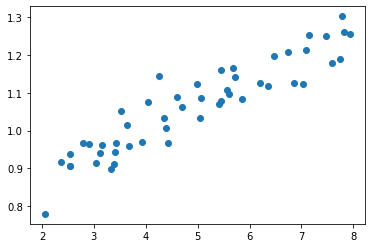

In [5]:
#a)
edad= np.loadtxt('edad.dat')
altura = np.loadtxt('altura.dat')

plt.scatter(edad, altura)

In [8]:
#viendo la regresión lineal
rea = RegresionLineal(alpha=0.03, max_iters=1000000, tols=0.000001)
rea.gradientDescent(edad,altura)

La función convergió con beta: [0.69583921 0.07376462] en la iteración 822


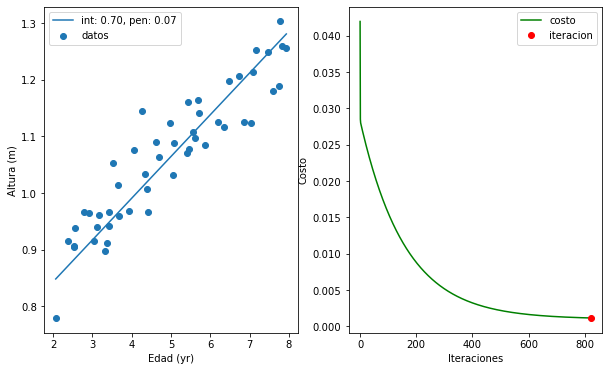

In [9]:
#beta0 = 0.69583921 y beta1= 0.07376462
plotModelo(edad,altura, rea, 821)

In [10]:
#hasta ahorita tenemos que nuestra varaible "x" es la edad y la "y" es la altura, saquemos la variable "z":
#sabemos que beta0=0.69583921 , beta1=0.07376462 ,  m=50

J = 1/(2*50)*Sum((Indexed(y,i) - 0.69583921 - 0.07376462*Indexed(x,i))**2, (i,1,50))
J

0.01*Sum((-0.07376462*x[i] + y[i] - 0.69583921)**2, (i, 1, 50))

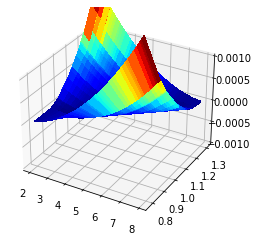

In [11]:
#ocupemos esto para sacar los valores de "z"
#de este modo logramos la grafica 3D
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
U = edad
V = altura

U, V = np.meshgrid(U, V)

R = 0.01*((-0.07376462*U + V -0.69583921)**2)
Z = R

surf = ax.plot_surface(U, V, Z, rstride=1, cstride=1, cmap=cm.jet,
      linewidth=0, antialiased=False)
ax.set_zlim3d(-0.001, 0.001);


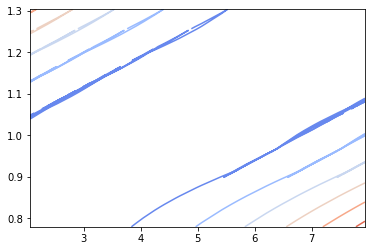

In [12]:
#ocupamos la misma información para hacerla una grafica de contorno
plt.contour(U, V, Z, cmap=cm.coolwarm)

In [15]:
#b 
#busquemos el punto de la última iteración. 
z = []
for i in range(len(edad)):
    z.append( 0.01*((-0.07376462*edad[i] + altura[i] -0.69583921)**2))
#el ultimo punto se encuentra en 
z[-1]

6.05791469154258e-06

# Código añadido por buena onda del profe

In [7]:
#a)

def J(beta0, beta1, X=edad, Y=altura):
    n=len(Y)
    costo=0
    for i in range(n):
        costo += 1/(2*n)*(Y[i]-beta0-beta1*X[1])**2
    return costo


In [10]:
betas0=np.arange(-10,10,0.1)
betas1=np.arange(-10,10,0.1)
B0, B1 = np.meshgrid(betas0, betas1)
C = J(B0,B1)

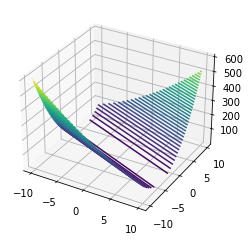

In [11]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(B0,B1,C,50)
plt.show()

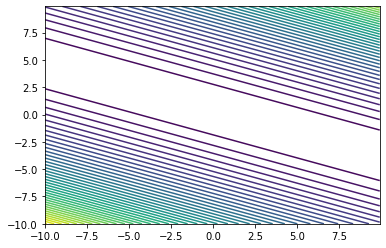

In [12]:
plt.contour(B0,B1,C,50)
plt.show()

In [18]:
r0 = RegresionLineal()
r0.gradientDescent(edad,altura)

La función convergió con beta: [0.57873101 0.095071  ] en la iteración 455


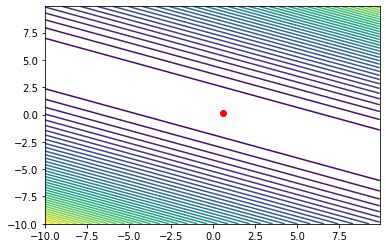

In [23]:
plt.contour(B0,B1,C,50)
plt.plot(r0.beta[0], r0.beta[1], 'ro')
plt.show()

In [22]:
from ipywidgets import interact, fixed, widgets, IntSlider, FloatSlider, interact_manual

In [27]:
def iterando(i):
    plt.contour(B0,B1,C,100)
    plt.plot(r0.beta[0],r0.beta[1],'go')
    plt.plot(r0.historia['beta'][i][0], r0.historia['beta'][i][1], 'ro')
    plt.show()

In [28]:
interact(iterando, i=IntSlider(min=0, max=454, step=1, value=0))

interactive(children=(IntSlider(value=0, description='i', max=454), Output()), _dom_classes=('widget-interact'…

<function __main__.iterando(i)>

In [30]:
def step_size(alpha=0.03):
    r0 = RegresionLineal(alpha)
    r0.gradientDescent(edad,altura)
    return r0.beta

In [31]:
interact_manual(step_size, alpha=FloatSlider(value=0.0001, min=0.0001,
               max=0.1, step=0.00001))

interactive(children=(FloatSlider(value=0.0001, description='alpha', max=0.1, min=0.0001, step=1e-05), Button(…

<function __main__.step_size(alpha=0.03)>

## Problema 3

**(a)**  Usando los datos de `chirps.txt`

In [3]:
%cat chirps.txt

#Chirps/Second 	Temperature (º F)
20.0 	88.6
16.0 	71.6
19.8 	93.3
18.4 	84.3
17.1 	80.6
15.5 	75.2
14.7 	69.7
15.7 	71.6
15.4 	69.4
16.3 	83.3
15.0 	79.6
17.2 	82.6
16.0 	80.6
17.0 	83.5
14.4 	76.3


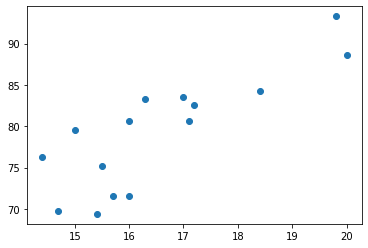

In [5]:
data = np.loadtxt('chirps.txt')
x=[]
y=[]
for i in data:
    x.append(float(i[0]))
    y.append(float(i[1]))
X= np.array(x)
Y=np.array(y)
plt.scatter(X,Y, label="chirps")

In [59]:
r = RegresionLineal(alpha=0.003, max_iters=1000000, tols=0.000001)
r.gradientDescent(X,Y)

La función convergió con beta: [20.99752813  3.52098074] en la iteración 84672


Entrenar una regresión lineal. Grafique los datos y el mejor modelo. Explique como llegó a los valores de $\alpha$. ¿Coinciden con los mostrados en la página web?

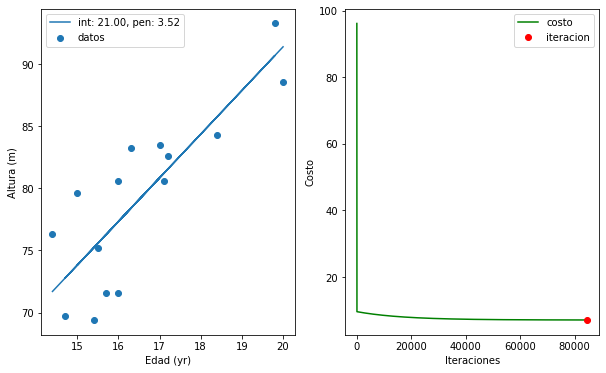

In [60]:
plotModelo(X,Y, r, 84671)
#Los datos son similares a los de la pagina web, pero difieren por algunos decimales.


**NOTA**: Datos obtenidos de [aquí](http://mathbits.com/MathBits/TISection/Statistics2/linearREAL.htm)


## Problema 4

**(a)** Usando los datos del [cuarteto de Anscombe](http://en.wikipedia.org/wiki/Anscombe%27s_quartet) Calcule la regresión lineal ¿Qué sucede?

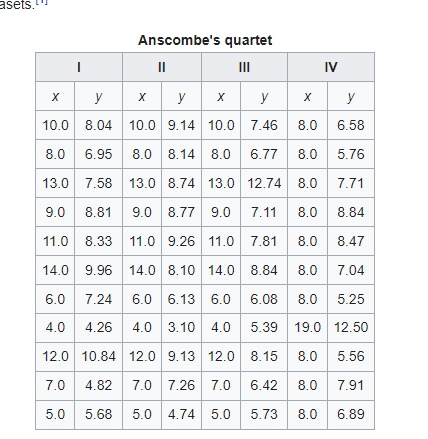

In [34]:
#1)
X1=np.array([10.,8.,13.,9.,11.,14.,6.,4.,12.,7.,5.])
Y1=np.array([8.04,6.95,7.58,8.81,8.33,9.96,7.24,4.26,10.84,4.82,5.68])
X2=np.array([10,8,13,9,11,14,6,4,12,7,5])
Y2=np.array([9.14,8.14,8.74,8.77,9.26,8.1,6.13,3.1,9.13,7.26,4.74])
X3=np.array([10,8,13,9,11,14,6,4,12,7,5])
Y3=np.array([7.46,6.77,12.74,7.11,7.81,8.84,6.08,5.39,8.15,6.42,5.73])
X4=np.array([8,8,8,8,8,8,8,19,8,8,8])
Y4=np.array([6.58,5.76,7.71,8.84,8.47,7.04,5.25,12.5,5.56,7.91,6.89])

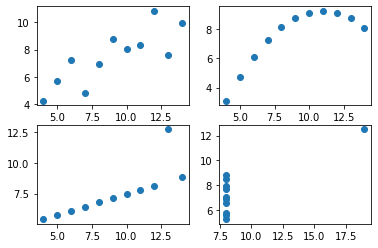

In [35]:
fig, ax = plt.subplots(2,2)

ax[0,0].scatter(X1,Y1)
ax[0,1].scatter(X2,Y2)
ax[1,0].scatter(X3,Y3)
ax[1,1].scatter(X4,Y4)

In [36]:
#Para los datos X1 y Y1
r1 = RegresionLineal(alpha=0.0003, max_iters=1000000, tols=0.000001)
r1.gradientDescent(X1,Y1)

La función convergió con beta: [2.47216482 0.55236589] en la iteración 52408


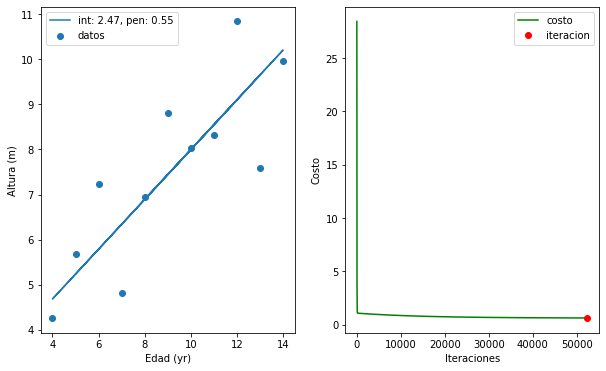

In [43]:
plotModelo(X1,Y1, r1, 52407)

In [37]:
#para los datos de X2 y Y2
r2 = RegresionLineal(alpha=0.0003, max_iters=1000000, tols=0.000001)
r2.gradientDescent(X2,Y2)

La función convergió con beta: [2.4729729  0.55227598] en la iteración 52416


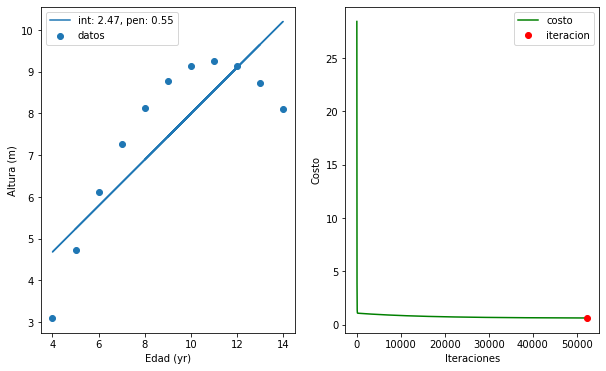

In [44]:
plotModelo(X2,Y2, r2, 52415)

In [38]:
#Para los datos de X3 y Y3
r3 = RegresionLineal(alpha=0.0003, max_iters=1000000, tols=0.000001)
r3.gradientDescent(X3,Y3)

La función convergió con beta: [2.47453017 0.55200209] en la iteración 52433


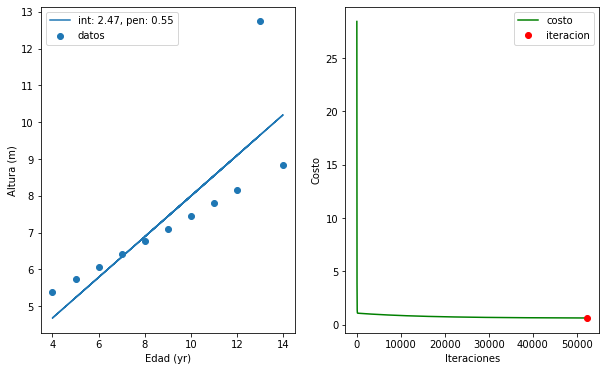

In [46]:
plotModelo(X3,Y3, r3, 52432)

In [39]:
#para los datos de X4 y Y4
r4 = RegresionLineal(alpha=0.0003, max_iters=1000000, tols=0.000001)
r4.gradientDescent(X4,Y4)

La función convergió con beta: [2.47379826 0.55218436] en la iteración 52425


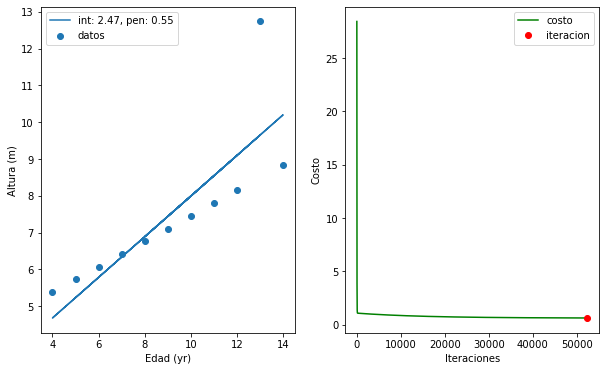

In [47]:
plotModelo(X3,Y3, r3, 52424)

## Problema 5 

Use el archivo `radioactive_decay.dat`

In [44]:
%cat data/radioactive_decay.txt

cat: data/radioactive_decay.txt: No such file or directory


**(a)** Grafique los datos ¿Qué forma tienen?

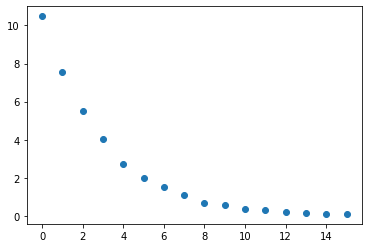

In [32]:
data5 = np.loadtxt("radioactive_decay.txt")
a = []
b = []
for i in data5:
    a.append(i[0])
    b.append(i[1])
A = np.array(a)
B = np.array(b)
plt.scatter(A,B)
#Tienen forma de e^-x

**(b)** ¿Qué transformación se le ocurre para linearizarlos? Explique y grafique de nuevo. Guarde los datos transformados en un archivo llamado `transform_radioactive_decay.txt`

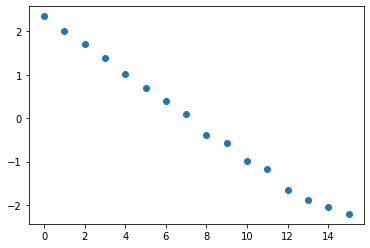

In [33]:
#Vamos a hacer un logaritmo natural para linilalizar la fucnción que tiene forma de e^-x
bT = []
for i in B:
    if i !=0:
        bT.append(np.log(i))
    else:
        bT.append(0.)
BT = np.array(bT)
plt.scatter(A,BT)    

In [36]:
abt = []
for i in range(len(A)):
    abt.append((A[i], BT[i]))
ABT = np.array(abt)
np.savetxt("transform_radioactive_decay.txt", ABT)

**(c)** Aplique la regresión lineal a este conjunto de datos transformado, leyendo los datos del archivo recién creado.

In [37]:
DataT = np.loadtxt("transform_radioactive_decay.txt")
xT = []
yT = []
for i in range(len(DataT)):
    xT.append(DataT[i][0])
    yT.append(DataT[i][1])
XT = np.array(xT)
YT = np.array(yT)

In [39]:
rT = RegresionLineal(alpha=0.0003, max_iters=1000000, tols=0.000001)
rT.gradientDescent(XT,YT)

La función convergió con beta: [ 2.08509717 -0.2961069 ] en la iteración 29311


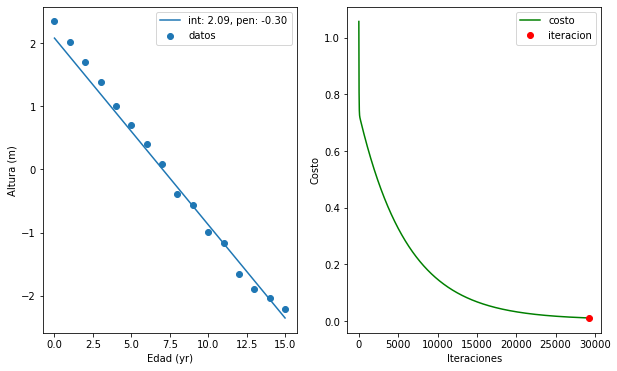

In [40]:
plotModelo(XT,YT, rT, 29310)

**(d)** ¿Cuáles son los valores de $\beta$ que mejor ajustan? ¿Cuáles son el espacio sin transformar? Explique.

Los datos betas que mejor se ajustan son  2.08509717 y -0.2961069. Es la ordenada al origen y la pendiente respectivamente. El espacio sin transformar son todos los datos del eje x, pues no varían junto con la ecuación por ser el tiempo. De esta manera podemos hacer una linealización de los datos, pues solamente varía los datos y. 